## Plotting Functions using Matplot

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as anime
import numpy as np
import pandas as pd

In [2]:
#Getting x value
xmin = 0
xmax = 10

In [3]:
#Parse to int
xmin = int(xmin)
xmax = int(xmax)

In [4]:
xmin = -2 * np.pi
xmax = 2 * np.pi

In [5]:
x = np.arange(xmin, xmax, 0.1)

In [6]:
#Functions
y1 = np.sin(x) * np.cos(x)
y2 = np.sin(x)/x

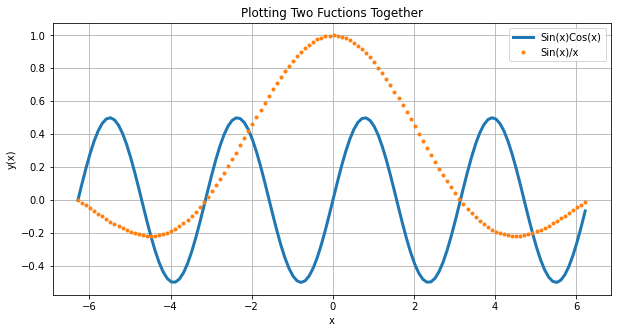

In [7]:
#Charts
plt.figure(figsize=(10,5))
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Plotting Two Fuctions Together')
plt.plot(x, y1, '-', lw=3, label='Sin(x)Cos(x)') #Axis x, Axis y, Type chart, lw = LineWeight
plt.plot(x, y2, '.', lw=3, label='Sin(x)/x') #Axis x, Axis y, Type chart, lw = LineWeight
plt.legend()
plt.grid()
plt.savefig('twofunc.pdf') # It must be right above of show()
plt.show()

## Plotting Subplots

In [8]:
xmin = -5; xmax =5; Npoints=500
dx = (xmax-xmin)/Npoints

x1 = np.arange(xmin,xmax,dx) #creating different x arrays
x2 = np.arange(xmin,xmax,dx/20)

y1 = -np.sin(x1)*np.cos(x1*x1)
y2 = np.exp(-x2/4)*np.sin(x2)

y3 = np.exp(-x1**2/4)
y4 = np.sin(x2)

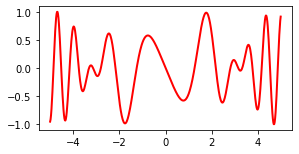

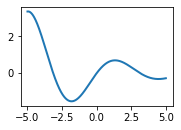

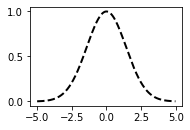

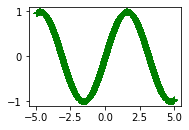

In [9]:
plt.figure(1, figsize=(10,5))

plt.subplot(2,2,1)   #2 rows, 2 column, plot1
plt.plot(x1,y1,'r',lw=2)
plt.show()

plt.subplot(2,2,2)#2 rows, 2 column,plot2
plt.plot(x2,y2,'-',lw=2)
plt.show()

plt.subplot(2,2,3)#2 rows, 2 column,plot3
plt.plot(x1,y3,'k--',lw=2)
plt.show()

plt.subplot(2,2,4)#2 rows, 2 column,plot4
plt.plot(x2,y4,'+g',lw=1)
plt.show()

## Color-Magnitude Diagram

In [10]:
# Read file
u,g = np.loadtxt('Skyserver_SQL4_23_2020 10_38_19 AM.csv', unpack = True, skiprows=2, usecols = (1,2), delimiter = ',')

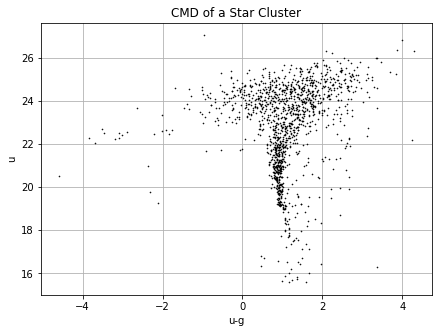

In [11]:
# Config chart
plt.figure(figsize=(7, 5))
plt.xlabel("u-g")
plt.ylabel("u")
plt.title("CMD of a Star Cluster")
plt.grid()
plt.plot(u-g, u, "ko", markersize=0.6)
plt.show()

In [12]:
stars_df = pd.read_csv('Skyserver_SQL4_23_2020 10_38_19 AM.csv', skiprows=1)
display(stars_df)

,objid,u,g,r,i,z
0,1237668355109617845,15.64877,14.65252,14.55741,14.22900,13.33909
1,1237668355109617848,16.42908,14.98056,14.36546,14.10973,13.94392
2,1237668355109617849,16.53623,15.13512,14.51652,14.26310,14.09655
3,1237668355109617850,15.89986,14.83650,14.47984,14.37411,14.32596
4,1237668355109617851,16.18958,14.97118,14.85165,14.84361,14.81034
...,...,...,...,...,...,...
1331,1237668678843960029,25.07740,24.40603,22.93468,22.13578,23.18481
1332,1237668678843960034,25.67852,24.46083,23.63751,22.17160,21.32797
1333,1237668678843960037,24.14375,24.43877,24.37989,21.98816,21.24062
1334,1237668678843960044,25.30115,25.19530,24.01880,22.14043,21.31675


In [13]:
stars_df.columns

Index(['objid', 'u', 'g', 'r', 'i', 'z'], dtype='object')

In [14]:
u = stars_df['u'].to_numpy()
g = stars_df['g'].to_numpy()
i = stars_df['i'].to_numpy()
z = stars_df['z'].to_numpy()

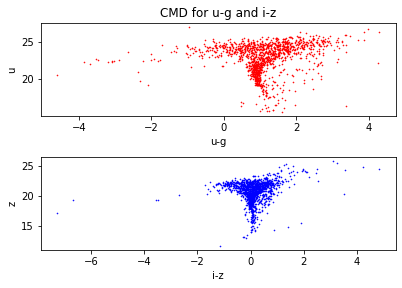

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.tight_layout(pad=2)

axes[0].plot(u-g, u, 'ro', markersize=0.6)
axes[0].set_xlabel("u-g")
axes[0].set_ylabel("u")
axes[0].set_title("CMD for u-g and i-z")

axes[1].plot(i-z, i, 'bo', markersize=0.6)
axes[1].set_xlabel("i-z")
axes[1].set_ylabel("z")

plt.show()

## AnimatedChart

In [16]:
x = np.arange(0,10,1)
y = x ** 2;

np.savetxt('samplefile.txt',(x,y))

xi = np.loadtxt('samplefile.txt', unpack = True)

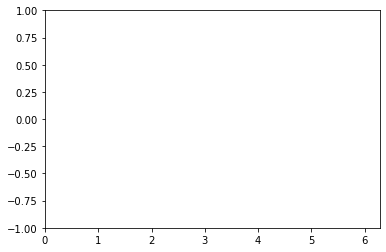

In [17]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro',markersize =0.8)
def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = anime.FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()